# Overview

## a) Introduction.


Customer Lifetime Value (CLV) prediction is crucial for businesses offering subscription services. By accurately estimating the long-term value of customers, companies can tailor marketing strategies, improve customer retention efforts, and optimize resource allocation for maximum revenue. This proposal outlines a comprehensive approach to develop a CLV prediction model using machine learning techniques.

## b) Problem Statement.

The objective is to create a reliable predictive model capable of accurately estimating the Customer Lifetime Value (CLV) of individual customers subscribing to services. This endeavor will empower businesses to:

 a) Make well-informed decisions regarding resource allocation, ensuring optimal utilization and efficiency.

 b) Fine-tune marketing strategies to effectively target high-value customers, maximizing return on investment and revenue generation.
 
 c) Implement strategic customer retention programs tailored to the unique needs and behaviors of different customer segments, fostering long-term loyalty and profitability.

## c)  Objectives.

● Collect and preprocess historical customer transaction data.

● Engineer relevant features that capture key aspects of customer behavior and purchasing patterns.

● Select appropriate machine learning algorithms and models for CLV prediction.

● Train and evaluate the performance of the CLV prediction model.

● Providing actionable insights and recommendations based on the model results.

## d) Metric of Success

Our model will be considered successful if the following metrics will be attained:

Recall score of 85%

Accuracy score of 86%


# Data Understanding

This data is about a subscription-based digital product offering for financial advisory that includes newsletters, webinars, and investment recommendations. The offering has a couple of varieties, annual subscription, and digital subscription. The product also provides daytime support for customers to reach out to a care team that can help them with any product-related questions and signup/cancellation-related queries.

The data set contains the following information:

 a) Customer sign-up and cancellation dates at the product level

 b) Call center activity

 c) Customer demographics

 d) Product pricing info

 This dataset was obtained from https://www.kaggle.com/datasets/gsagar12/dspp1?resource=download&select=customer_product.csv

In [92]:
# importing necessaries libraries
# basic
import pandas as pd
import numpy as np


# time
from datetime import datetime

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#warnings.fiterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

In [93]:
case = pd.read_csv("data/customer_cases.csv")
case.head()

,Unnamed: 0,case_id,date_time,customer_id,channel,reason
0,1,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,2,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,3,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,4,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,5,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [94]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   330512 non-null  int64 
 1   case_id      330512 non-null  object
 2   date_time    330512 non-null  object
 3   customer_id  330512 non-null  object
 4   channel      330512 non-null  object
 5   reason       330512 non-null  object
dtypes: int64(1), object(5)
memory usage: 15.1+ MB


In [95]:
case = case.drop(columns=["Unnamed: 0"])
case.head()

,case_id,date_time,customer_id,channel,reason
0,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [96]:
info = pd.read_csv("data/customer_info.csv")
info.head()

,Unnamed: 0,customer_id,age,gender
0,1,C2448,76,female
1,2,C2449,61,male
2,3,C2450,58,female
3,4,C2451,62,female
4,5,C2452,71,male


In [97]:
info = info.drop(columns=["Unnamed: 0"])
info.head()

,customer_id,age,gender
0,C2448,76,female
1,C2449,61,male
2,C2450,58,female
3,C2451,62,female
4,C2452,71,male


In [98]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  508932 non-null  object
 1   age          508932 non-null  int64 
 2   gender       508932 non-null  object
dtypes: int64(1), object(2)
memory usage: 11.6+ MB


In [99]:
merge_one = pd.merge(case, info, on="customer_id")
merge_one.head()

,case_id,date_time,customer_id,channel,reason,age,gender
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male


In [100]:
product = pd.read_csv("data/customer_product.csv")
product.head()

,Unnamed: 0,customer_id,product,signup_date_time,cancel_date_time
0,1,C2448,prd_1,2017-01-01 10:35:09,NaN
1,2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,4,C2451,prd_2,2017-01-01 13:32:08,NaN
4,5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [101]:
product = product.drop(columns=["Unnamed: 0"])
product.head()

,customer_id,product,signup_date_time,cancel_date_time
0,C2448,prd_1,2017-01-01 10:35:09,NaN
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,C2451,prd_2,2017-01-01 13:32:08,NaN
4,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [102]:
merge_two = pd.merge(merge_one, product, on= "customer_id")
merge_two.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [103]:
p_info = pd.read_csv("data/product_info.csv")
p_info.head()

,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [104]:
p_info.rename(columns={"product_id": "product"}, inplace=True)
p_info.head()

,product,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [105]:
data = pd.merge(merge_two, p_info, on="product")
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time,name,price,billing_cycle
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN,annual_subscription,1200,12
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,annual_subscription,1200,12
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,annual_subscription,1200,12
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN,monthly_subscription,125,1
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,annual_subscription,1200,12


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   case_id           330512 non-null  object
 1   date_time         330512 non-null  object
 2   customer_id       330512 non-null  object
 3   channel           330512 non-null  object
 4   reason            330512 non-null  object
 5   age               330512 non-null  int64 
 6   gender            330512 non-null  object
 7   product           330512 non-null  object
 8   signup_date_time  330512 non-null  object
 9   cancel_date_time  76686 non-null   object
 10  name              330512 non-null  object
 11  price             330512 non-null  int64 
 12  billing_cycle     330512 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 32.8+ MB


In [107]:
display(data.describe(), data.describe(include="object"))

,age,price,billing_cycle
count,330512.000000,330512.000000,330512.000000
mean,57.840617,672.163265,6.598880
std,9.394142,537.413942,5.499119
min,22.000000,125.000000,1.000000
25%,52.000000,125.000000,1.000000
50%,58.000000,1200.000000,12.000000
75%,65.000000,1200.000000,12.000000
max,78.000000,1200.000000,12.000000


,case_id,date_time,customer_id,channel,reason,gender,product,signup_date_time,cancel_date_time,name
count,330512,330512,330512,330512,330512,330512,330512,330512,76686,330512
unique,330512,329205,258660,2,2,2,2,257798,59539,2
top,CC101,2021-05-18 13:58:31,C20510,phone,support,male,prd_1,2020-03-30 10:32:51,2021-08-16 13:06:05,annual_subscription
freq,1,3,5,286840,200985,189224,168227,6,5,168227


- 330512 total cases

## Data Cleaning

In [108]:
data.isnull().sum()

case_id                  0
date_time                0
customer_id              0
channel                  0
reason                   0
age                      0
gender                   0
product                  0
signup_date_time         0
cancel_date_time    253826
name                     0
price                    0
billing_cycle            0
dtype: int64

set the cancel date and month as a current date for the null values to mean they have an active subscription

In [109]:
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time,name,price,billing_cycle
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN,annual_subscription,1200,12
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,annual_subscription,1200,12
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,annual_subscription,1200,12
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN,monthly_subscription,125,1
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,annual_subscription,1200,12


In [110]:
#from datetime import datetime

#current_date = datetime.now()

#data["cancel_time"] = data["cancel_time"].fillna(current_date.strftime("%H:%M:%S"))
#data["cancel_month"] = data["cancel_month"].fillna(current_date.month)
#data["cancel_year"] = data["cancel_year"].fillna(current_date.year)

#data.head()

In [111]:
data.isnull().sum()

case_id                  0
date_time                0
customer_id              0
channel                  0
reason                   0
age                      0
gender                   0
product                  0
signup_date_time         0
cancel_date_time    253826
name                     0
price                    0
billing_cycle            0
dtype: int64

In [112]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

# Show the duplicate rows
duplicate_data = data[duplicate_rows]
print("Duplicate rows:")
print(duplicate_data)


Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [case_id, date_time, customer_id, channel, reason, age, gender, product, signup_date_time, cancel_date_time, name, price, billing_cycle]
Index: []


In [113]:
has_infinite_values = data.isin([np.inf, -np.inf]).any().any()
print(has_infinite_values)

False


# EDA

In [114]:
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time,name,price,billing_cycle
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN,annual_subscription,1200,12
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,annual_subscription,1200,12
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,annual_subscription,1200,12
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN,monthly_subscription,125,1
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,annual_subscription,1200,12


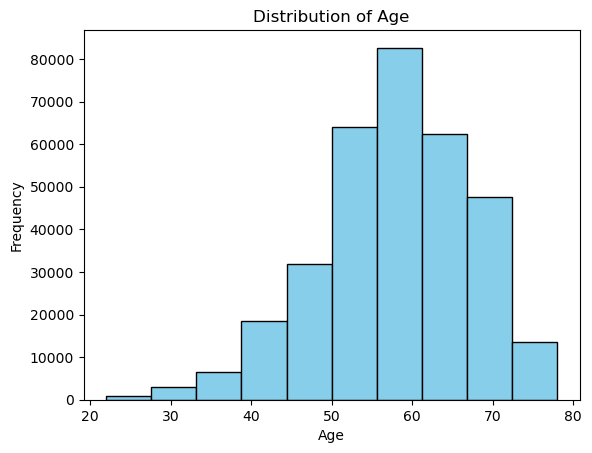

In [115]:
# visualizing age distribution
plt.hist(data["age"], bins=10, color="skyblue", edgecolor="black")

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

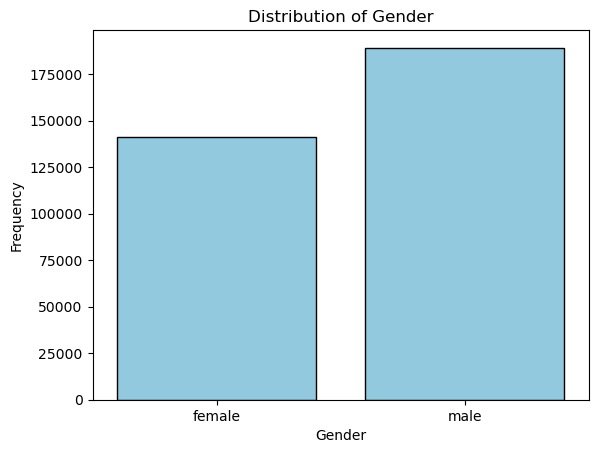

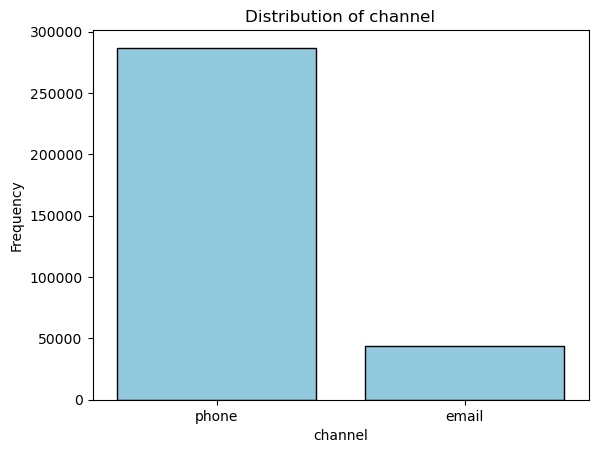

In [116]:
sns.countplot(x='gender', data=data, color="skyblue", edgecolor="black")

plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender")
plt.show()
sns.countplot(x='channel', data=data, color="skyblue", edgecolor="black")

plt.xlabel("channel")
plt.ylabel("Frequency")
plt.title("Distribution of channel")
plt.show()

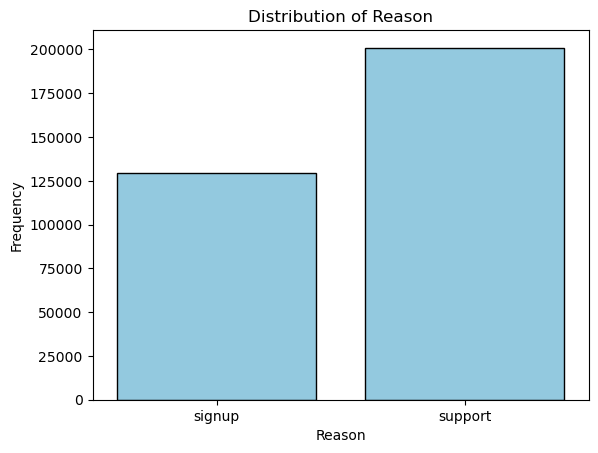

In [117]:
sns.countplot(x='reason', data=data, color="skyblue", edgecolor="black")

plt.xlabel("Reason")
plt.ylabel("Frequency")
plt.title("Distribution of Reason")
plt.show()

In [118]:
# splitting sign-up time
data[["signup_date", "signup_time"]] = data["signup_date_time"].str.split(' ', expand=True)
data["signup_date"] = pd.to_datetime(data["signup_date"])
# dropping signup date time column
data.drop(columns=["signup_date_time"], inplace=True)

# splitting signup date to month and year
data["signup_month"] = data["signup_date"].dt.month
data["signup_year"] = data["signup_date"].dt.year
# dropping signup date
data.drop(columns=["signup_date"], inplace=True)

data.head()


,case_id,date_time,customer_id,channel,reason,age,gender,product,cancel_date_time,name,price,billing_cycle,signup_time,signup_month,signup_year
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,NaN,annual_subscription,1200,12,10:35:09,1,2017
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2021-09-05 10:00:02,annual_subscription,1200,12,11:39:29,1,2017
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2019-01-13 16:24:55,annual_subscription,1200,12,11:42:00,1,2017
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,NaN,monthly_subscription,125,1,13:32:08,1,2017
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2021-06-28 18:06:01,annual_subscription,1200,12,13:57:30,1,2017


In [119]:
# splitting cancel date time
data[["cancel_date", "end_time"]] = data["cancel_date_time"].str.split(' ', expand=True)
data["cancel_date"] = pd.to_datetime(data["cancel_date"])
# dropping cancel_date_time
data.drop(columns=["cancel_date_time"], inplace=True)

# Extracting month and year from cancel date
data["end_month"] = data["cancel_date"].dt.month
data["end_year"] = data["cancel_date"].dt.year

data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,name,price,billing_cycle,signup_time,signup_month,signup_year,cancel_date,end_time,end_month,end_year
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,10:35:09,1,2017,NaT,NaN,NaN,NaN
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,11:39:29,1,2017,2021-09-05,10:00:02,9.0,2021.0
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,11:42:00,1,2017,2019-01-13,16:24:55,1.0,2019.0
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,13:32:08,1,2017,NaT,NaN,NaN,NaN
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,13:57:30,1,2017,2021-06-28,18:06:01,6.0,2021.0


In [120]:
data.dtypes

case_id                  object
date_time                object
customer_id              object
channel                  object
reason                   object
age                       int64
gender                   object
product                  object
name                     object
price                     int64
billing_cycle             int64
signup_time              object
signup_month              int32
signup_year               int32
cancel_date      datetime64[ns]
end_time                 object
end_month               float64
end_year                float64
dtype: object

In [122]:
current_date = datetime.now()

data["end_time"] = data["end_time"].fillna(current_date.strftime("%H:%M:%S"))
data["end_month"] = data["end_month"].fillna(current_date.month)
data["end_year"] = data["end_year"].fillna(current_date.year)

data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,name,price,billing_cycle,signup_time,signup_month,signup_year,cancel_date,end_time,end_month,end_year
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,10:35:09,1,2017,NaT,18:58:55,4.0,2024.0
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,11:39:29,1,2017,2021-09-05,10:00:02,9.0,2021.0
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,11:42:00,1,2017,2019-01-13,16:24:55,1.0,2019.0
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,13:32:08,1,2017,NaT,18:58:55,4.0,2024.0
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,13:57:30,1,2017,2021-06-28,18:06:01,6.0,2021.0


In [123]:
data["end_month"] = data["end_month"].astype(int)
data["end_year"] = data["end_year"].astype(int)

data.dtypes

case_id                  object
date_time                object
customer_id              object
channel                  object
reason                   object
age                       int64
gender                   object
product                  object
name                     object
price                     int64
billing_cycle             int64
signup_time              object
signup_month              int32
signup_year               int32
cancel_date      datetime64[ns]
end_time                 object
end_month                 int32
end_year                  int32
dtype: object

In [124]:
data["lifetime_months"] = (data["end_year"] - data["signup_year"]) *12 + (data["end_month"] - data["signup_month"])
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,name,price,billing_cycle,signup_time,signup_month,signup_year,cancel_date,end_time,end_month,end_year,lifetime_months
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,10:35:09,1,2017,NaT,18:58:55,4,2024,87
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,11:39:29,1,2017,2021-09-05,10:00:02,9,2021,56
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,11:42:00,1,2017,2019-01-13,16:24:55,1,2019,24
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,13:32:08,1,2017,NaT,18:58:55,4,2024,87
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,13:57:30,1,2017,2021-06-28,18:06:01,6,2021,53


In [125]:
# calculating Customer Lifetime Value
data["customer_lifetime_value"] = 0

for index, row in data.iterrows():
    if row["name"] == "annual_subscription":
        lifetime_years = row["lifetime_months"] / 12
        total_revenue = row["price"] *lifetime_years
    else:
        total_revenue = row["price"] * row["lifetime_months"]
    
    data.at[index, "customer_lifetime_value"]  = total_revenue
    
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,name,price,billing_cycle,signup_time,signup_month,signup_year,cancel_date,end_time,end_month,end_year,lifetime_months,customer_lifetime_value
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,10:35:09,1,2017,NaT,18:58:55,4,2024,87,8700
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,11:39:29,1,2017,2021-09-05,10:00:02,9,2021,56,5600
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,11:42:00,1,2017,2019-01-13,16:24:55,1,2019,24,2400
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,13:32:08,1,2017,NaT,18:58:55,4,2024,87,10875
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,13:57:30,1,2017,2021-06-28,18:06:01,6,2021,53,5300


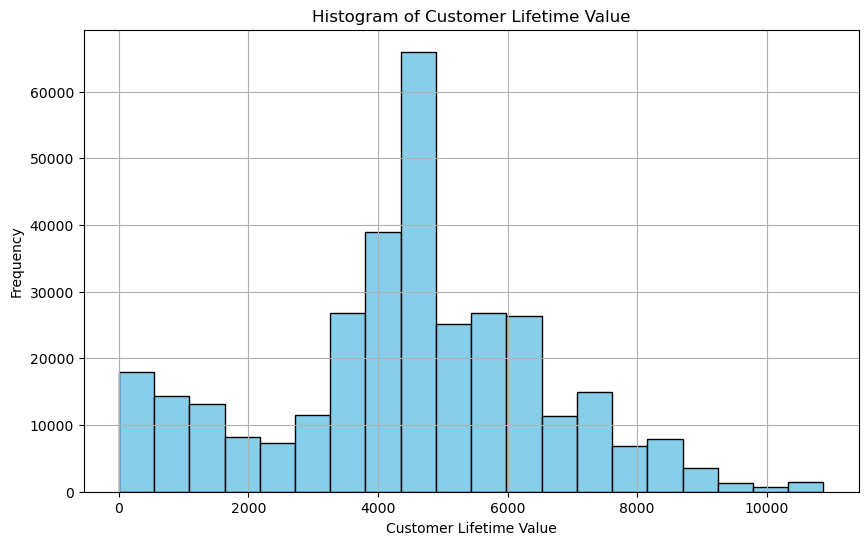

In [133]:
plt.figure(figsize=(10, 6))
plt.hist(data['customer_lifetime_value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Customer Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


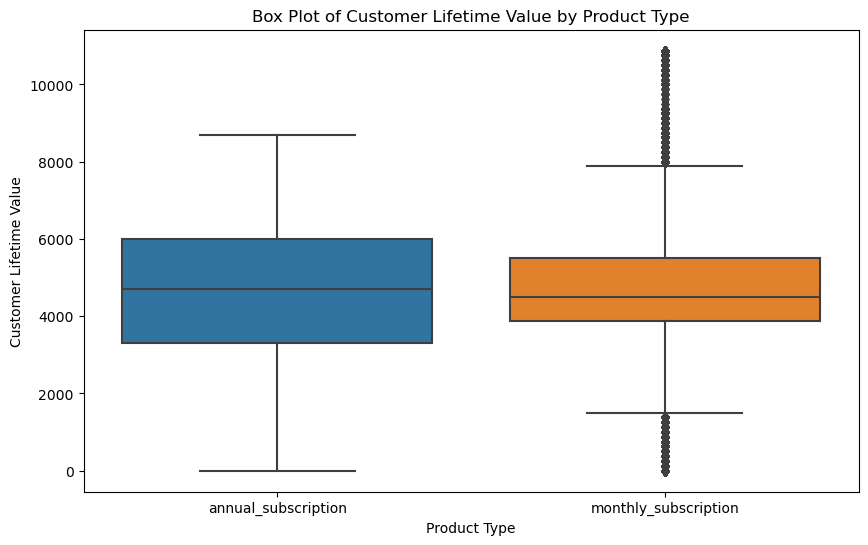

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='name', y='customer_lifetime_value', data=data)
plt.title('Box Plot of Customer Lifetime Value by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Customer Lifetime Value')
plt.show()


In [134]:
data.dtypes

case_id                            object
date_time                          object
customer_id                        object
channel                            object
reason                             object
age                                 int64
gender                             object
product                            object
name                               object
price                               int64
billing_cycle                       int64
signup_time                        object
signup_month                        int32
signup_year                         int32
cancel_date                datetime64[ns]
end_time                           object
end_month                           int32
end_year                            int32
lifetime_months                     int32
customer_lifetime_value             int64
dtype: object

In [135]:
repeat_cases = data.groupby('customer_id').size()
print("Number of repeat cases by the same customer:")
print(repeat_cases)

Number of repeat cases by the same customer:
customer_id
C10000     2
C100000    2
C100001    1
C100002    1
C100003    1
          ..
C99995     2
C99996     2
C99997     3
C99998     1
C99999     2
Length: 258660, dtype: int64


# Feature Analysis

In [136]:
categorical_features = data.select_dtypes(include=['object', 'category'])

non_categorical_features = data.select_dtypes(exclude=['object', 'category'])

print("Categorical Features:")
print(categorical_features.columns.tolist())
print("\nNon-Categorical Features:")
print(non_categorical_features.columns.tolist())


Categorical Features:
['case_id', 'date_time', 'customer_id', 'channel', 'reason', 'gender', 'product', 'name', 'signup_time', 'end_time']

Non-Categorical Features:
['age', 'price', 'billing_cycle', 'signup_month', 'signup_year', 'cancel_date', 'end_month', 'end_year', 'lifetime_months', 'customer_lifetime_value']


In [137]:
encoded_data = data.copy()

encoded_data = pd.get_dummies(encoded_data, columns=['reason', 'gender', 'name'])

encoded_data.head()

,case_id,date_time,customer_id,channel,age,product,price,billing_cycle,signup_time,signup_month,...,end_month,end_year,lifetime_months,customer_lifetime_value,reason_signup,reason_support,gender_female,gender_male,name_annual_subscription,name_monthly_subscription
0,CC101,2017-01-01 10:32:03,C2448,phone,76,prd_1,1200,12,10:35:09,1,...,4,2024,87,8700,True,False,True,False,True,False
1,CC102,2017-01-01 11:35:47,C2449,phone,61,prd_1,1200,12,11:39:29,1,...,9,2021,56,5600,True,False,False,True,True,False
2,CC103,2017-01-01 11:37:09,C2450,phone,58,prd_1,1200,12,11:42:00,1,...,1,2019,24,2400,True,False,True,False,True,False
3,CC104,2017-01-01 13:28:14,C2451,phone,62,prd_2,125,1,13:32:08,1,...,4,2024,87,10875,True,False,True,False,False,True
4,CC105,2017-01-01 13:52:22,C2452,phone,71,prd_1,1200,12,13:57:30,1,...,6,2021,53,5300,True,False,False,True,True,False


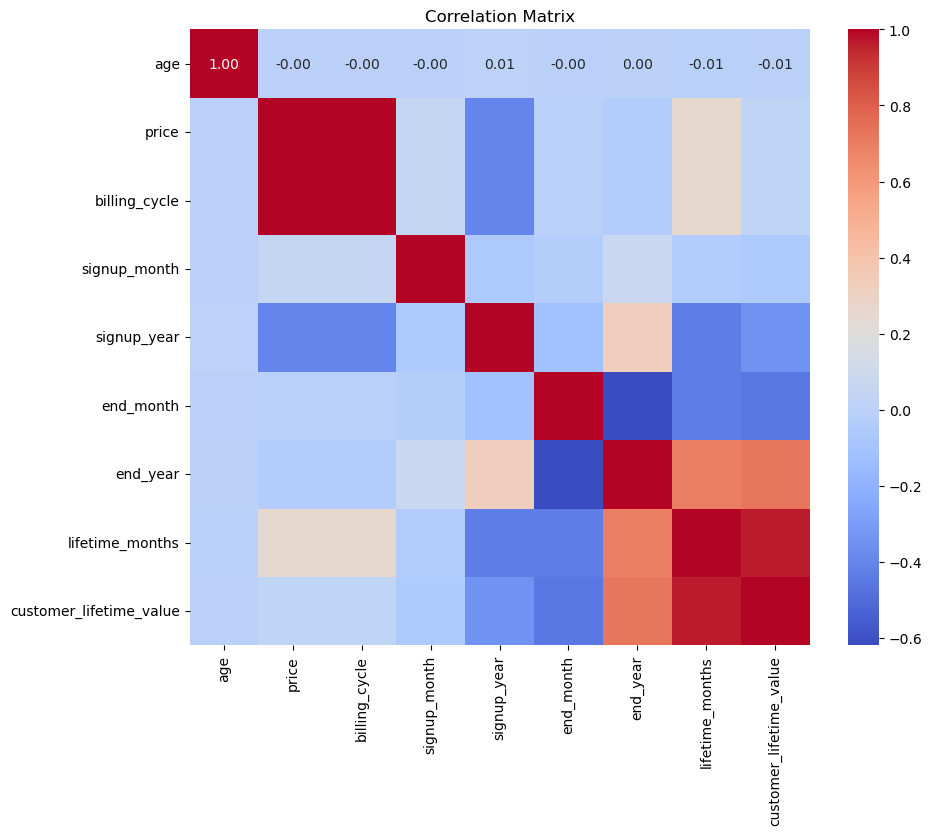

In [138]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [140]:
features_of_interest = ['age', 'price', 'billing_cycle', 'signup_month', 'signup_year',
                        'end_month', 'end_year', 'lifetime_months',
                        'reason_signup', 'reason_support', 'gender_female', 'gender_male',
                        'name_annual_subscription', 'name_monthly_subscription', 'customer_lifetime_value']

# encoded data with only the selected features
subset_data = encoded_data[features_of_interest]

#correlation matrix
correlation_matrix = subset_data.corr()
print(correlation_matrix['customer_lifetime_value'].sort_values(ascending=False))


customer_lifetime_value      1.000000
lifetime_months              0.968307
end_year                     0.723603
price                        0.028257
name_annual_subscription     0.028257
billing_cycle                0.028257
reason_signup                0.013887
gender_female                0.003807
gender_male                 -0.003807
age                         -0.005881
reason_support              -0.013887
name_monthly_subscription   -0.028257
signup_month                -0.055005
signup_year                 -0.352882
end_month                   -0.451132
Name: customer_lifetime_value, dtype: float64


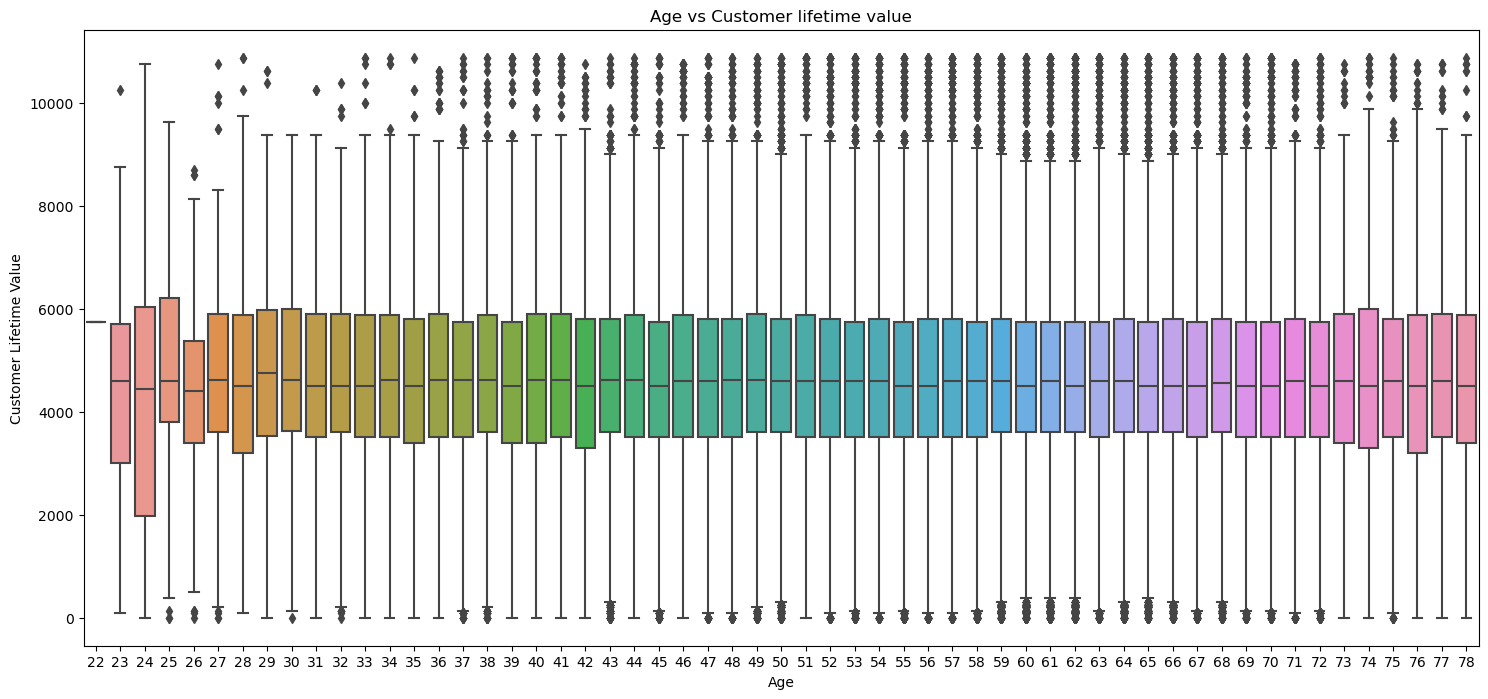

In [141]:
# Visualization against clv
plt.figure(figsize=(18, 8))
sns.boxplot(x="age", y="customer_lifetime_value", data=data)
plt.title("Age vs Customer lifetime value")
plt.xlabel("Age")
plt.ylabel("Customer Lifetime Value")
plt.show()

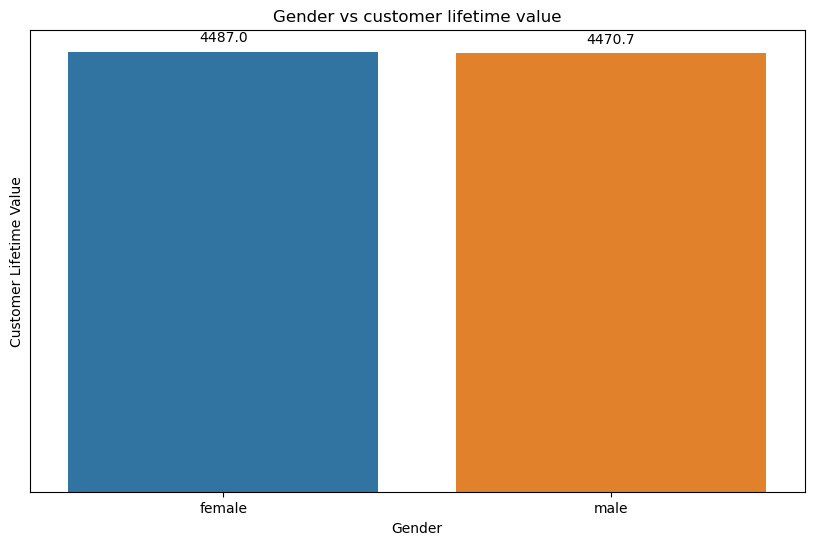

In [142]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x="gender", y="customer_lifetime_value", data=data, errorbar=None)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords='offset points'             
                )
plt.title("Gender vs customer lifetime value")
plt.xlabel("Gender")
plt.ylabel("Customer Lifetime Value")
plt.yticks([])
plt.show()

note females spendings as compared to frequency

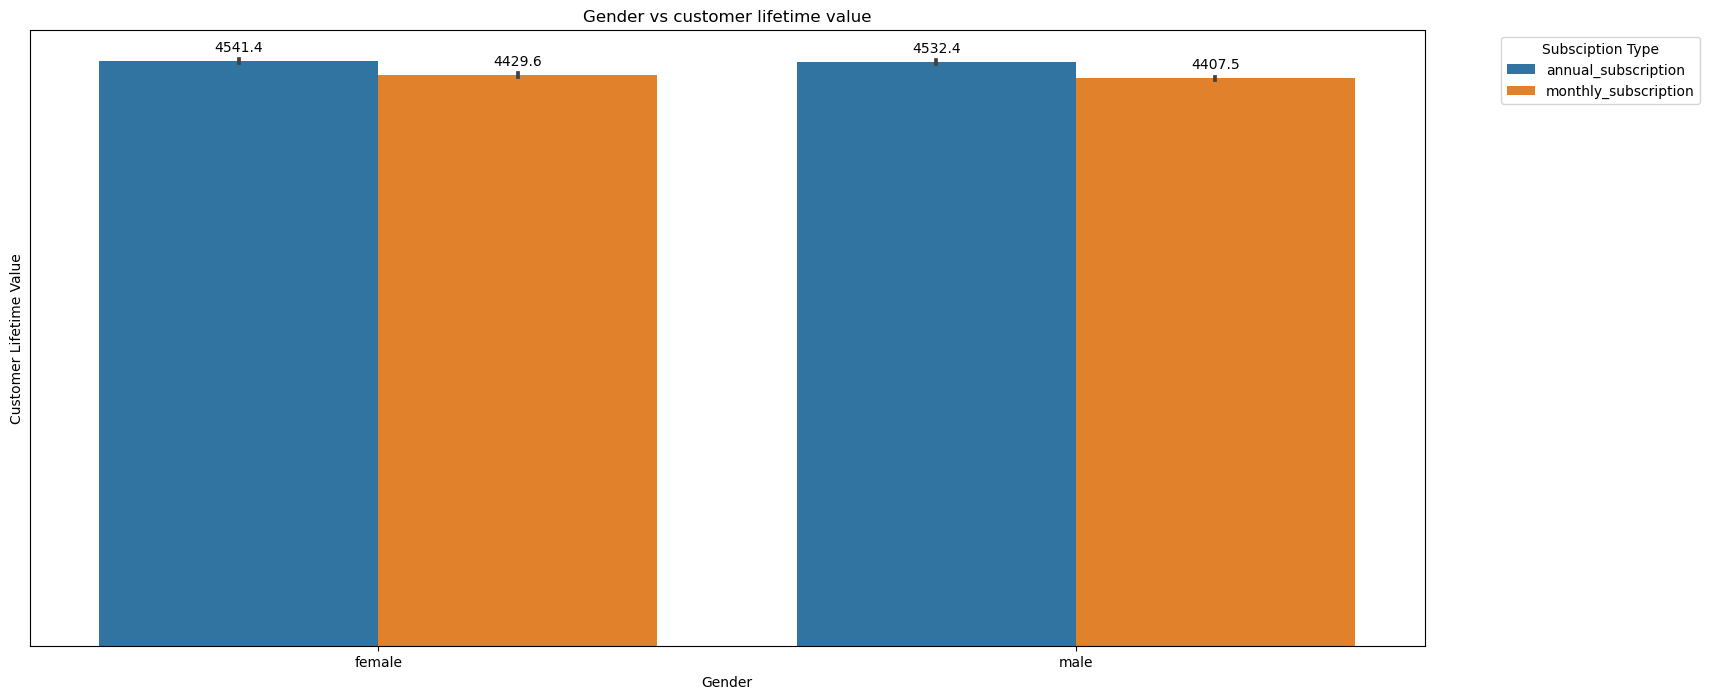

In [143]:
plt.figure(figsize=(18, 8))
ax = sns.barplot(x="gender", y="customer_lifetime_value", hue="name", data=data)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords='offset points'
                )

plt.yticks([])
plt.title("Gender vs customer lifetime value")
plt.xlabel("Gender")
plt.ylabel("Customer Lifetime Value")
plt.legend(title="Subsciption Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

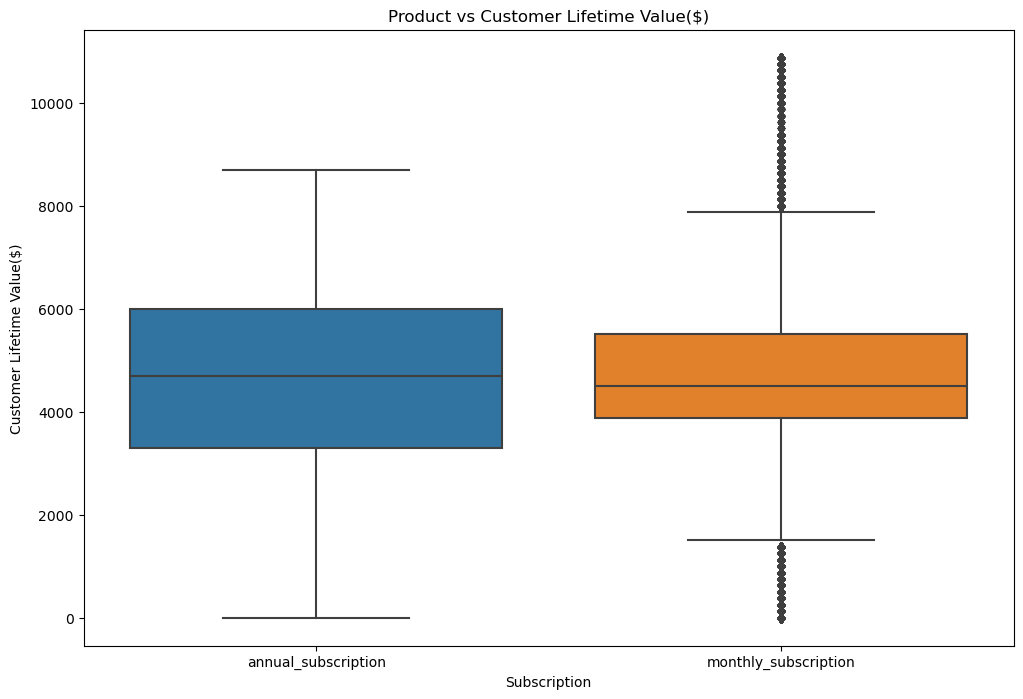

In [144]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="name", y="customer_lifetime_value", data=data)
plt.title("Product vs Customer Lifetime Value($)")
plt.xlabel("Subscription")
plt.ylabel("Customer Lifetime Value($)")
plt.show()

We will keep Monthly subcription outliers as they are important

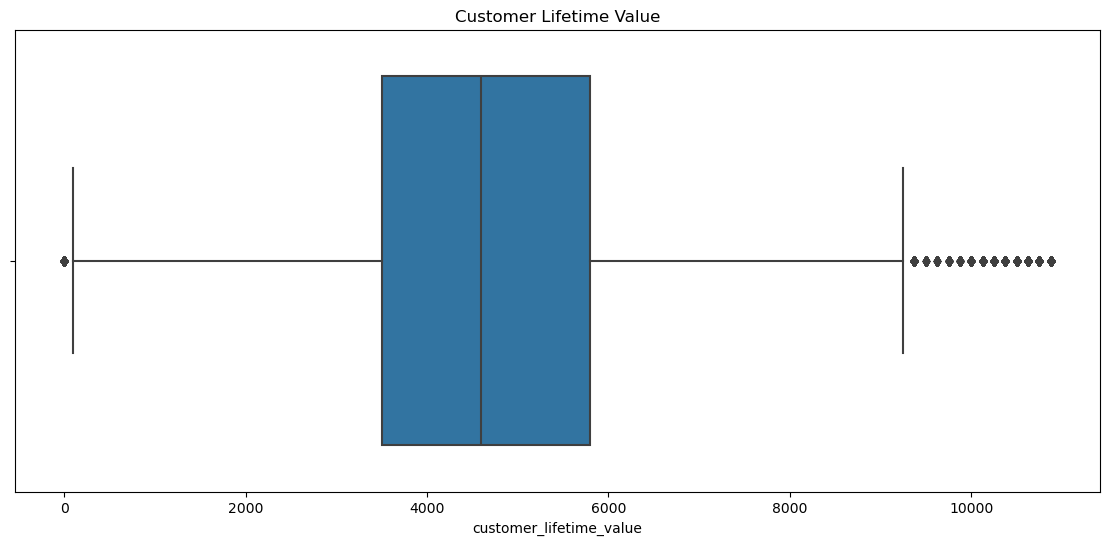

In [145]:
# visualize clv outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x="customer_lifetime_value").set(title="Customer Lifetime Value")

plt.show()

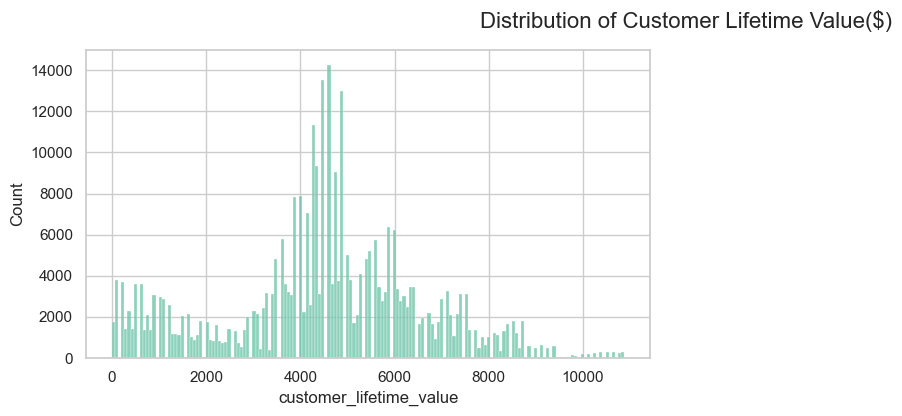

In [146]:
sns.set_theme(style="whitegrid", palette="Set2")

fig = plt.figure(figsize=(16, 4))
fig.suptitle("Distribution of Customer Lifetime Value($)", size=16)

# Histogram
plt.subplot(1,2,1)
sns.histplot(data=data, x="customer_lifetime_value")

plt.show()

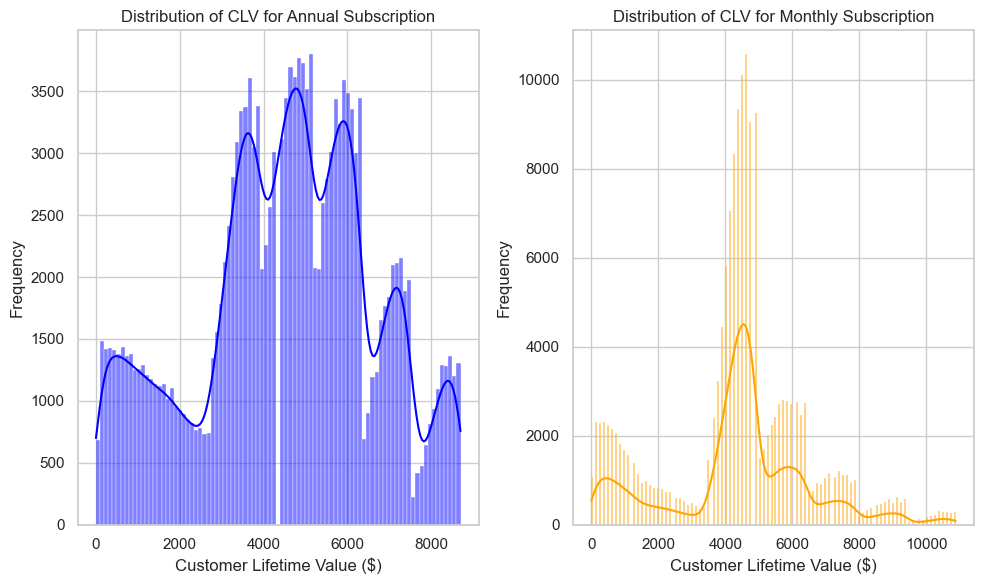

In [147]:
# checking distribution of clv for annual and monthly
sns.set_theme(style="whitegrid", palette="Set2")

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.histplot(data=data[data["name"] == "annual_subscription"], x="customer_lifetime_value", color="blue", label="Annual Subscription", kde=True, ax=axes[0])
axes[0].set_title("Distribution of CLV for Annual Subscription")
axes[0].set_xlabel("Customer Lifetime Value ($)")
axes[0].set_ylabel("Frequency")

sns.histplot(data=data[data["name"] == "monthly_subscription"], x="customer_lifetime_value", color="orange", label="Monthly Subscription", kde=True, ax=axes[1])
axes[1].set_title("Distribution of CLV for Monthly Subscription")
axes[1].set_xlabel("Customer Lifetime Value ($)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [148]:
support_cases = data[data['reason'] == 'support']
repeat_support_cases = support_cases.groupby('customer_id').size()

print("Number of repeat support cases by the same customer:")
print(repeat_support_cases)

Number of repeat support cases by the same customer:
customer_id
C10000     1
C100000    1
C100005    1
C100006    1
C100008    1
          ..
C99994     1
C99995     1
C99996     1
C99997     2
C99999     1
Length: 176235, dtype: int64


## Modelling

In [ ]:
# Regression Analysis:
# Objective: Predicting CLV based on customer attributes and transaction history.
# Advantages: Provides interpretable coefficients, allows for hypothesis testing, and can handle both continuous and categorical predictors.
# Considerations: Assumes a linear relationship between predictors and CLV, may require feature engineering to capture non-linear relationships.
# Machine Learning Regression (e.g., Random Forest, Gradient Boosting):
# Objective: Predicting CLV with more complex models and potentially capturing non-linear relationships.
# Advantages: Can handle complex interactions between predictors, often more accurate than simple linear models, and less susceptible to overfitting with proper regularization.
# Considerations: Requires more computational resources, may be less interpretable than traditional regression models.

# Deep Learning:
# Objective: Predicting CLV using neural networks with multiple layers.
# Advantages: Can capture complex patterns in data, automatically extract features, and potentially achieve high predictive accuracy.
# Considerations: Requires large amounts of data, computational resources, and careful hyperparameter tuning.